# Vektorimuotoinen paikkatieto

Vektoriaineistot ovat paikkatietoa joko piste- viiva- tai polygon-muodossa. Tässä osiossa tutustutaan vektoridatan käsittelyn perusteisiin Pythonissa.

# Shapely ja geometriat

**Shapely** on vektoriaineistojen kannalta olennainen kirjasto, sillä se toteuttaa tuen geometrioiden luontiin, esittämiseen ja moniin spatiaalisiin operaatioihin.  GeoPandasin geometriat perustuvat täysin Shapelyyn, joten, vaikka shapelyä ei välttämättä käytettäisi suoraan, on hyvä ymmärtää kirjaston perusteet.

Aloitetaan ottamalla käyttöön Shapely-kirjastosta pisteet, viivat ja monikulmiot.

In [1]:
from shapely import Point, LineString, Polygon

Voimme nyt luoda pisteen, eli **Point**-olion. Huomaa myös iso P olitota luodessa - Pythonissa *konstruktorit*, eli olioita luovat metodit, kirjoitetaan usein käyttämällä CamelCase-notaatiota.

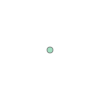

In [2]:
point = Point(1, 2)
point

In [3]:
print(point)

POINT (1 2)


Voimme ottaa mukaan myös kolmannen ulottuvuuden:

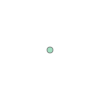

In [4]:
point_3d = Point(2, 4, 1)
point_3d

Tehdään seuraavaksi monta pistettä, ja muodostetaan niistä viiva (**LineString**-olio):

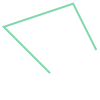

In [5]:
point_1 = Point(0, 0)
point_2 = Point(-1, 1)
point_3 = Point(0.5, 1.5)
point_4 = Point(1, 0.5)

list_of_points = [point_1, point_2, point_3, point_4]

line = LineString(list_of_points)
line

Shapely-geometrioilla on monia hyödyllisiä attribuutteja. Tässä esimerkiksi viivan pituus ja massakeskipiste.

In [6]:
print(line.length)
print(line.centroid)

4.11338638120718
POINT (-0.0641481185309257 0.9241933422325408)


Monikulmion luonti onnistuu samaan tapaan:

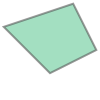

In [7]:
polygon = Polygon(list_of_points)
polygon

Monikulmiolle voidaan laskea myös alue:

POINT (0.0897435897435897 0.7692307692307693)
1.625


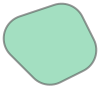

In [8]:
print(polygon.centroid)
print(polygon.area)
polygon.buffer(1)

Shapely tukee myös multi -versioita kaikista geometriatyypeistä:

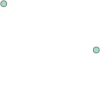

In [9]:
from shapely import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint(
    [Point(1, 2), Point(3, 1)]
)
multipoint

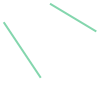

In [10]:
multiline = MultiLineString(
    [LineString([(1, 7), (6, 4)]), LineString([(0, -1), (-4, 5)])]
)
multiline

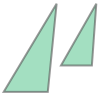

In [11]:
multipolygon = MultiPolygon(
    [Polygon([(0, 0), (-10, 0), (2, 20)]), Polygon([(3, 6), (10, 6), (11, 20)])]
)
multipolygon

## Harjoitus - ympyrä

Tee Shapely-geometrioita ja metodeja hyödyntäen "ympyrä".
1. Vinkki: et tarvitse yhtäkään uutta `import`-komentoa.
2. Vinkki: tämä on hieman kompakysymys. Helpompaa voi olla ajatella: mitä geometriatyyppiä ja metodia käyttämällä teen mahdollisimman pyöreän monikulmion?

In [12]:
# Kirjoita ratkaisu


## Ratkaisu

<class 'shapely.geometry.polygon.Polygon'>


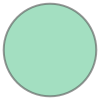

In [13]:
my_circle = Point(1,1).buffer(10)

print(type(my_circle))
my_circle

# GeoPandas

Seuraavaksi siirrytään vektoriaineistojen käsittelyssä erittäin monikäyttöiseen **GeoPandas**-kirjastoon. GeoPandas on aktiivisesti ylläpidetty ja kehitetty, laajalti käytetty kirjasto, joka on vakiinnuttanut asemansa paikkatietoalalla. Se tukee lähes mitä vain vektorimuotoisia paikkatietoformaatteja, sekä toimii yhteen esim. PostGISin kanssa.

# GeoDataFrame ja GeoSeries

GeoPandasissa keskeisin tietorakenne on **GeoDataFrame**. Se on muuten aivan kuin Pandasin DataFrame, mutta tukee geometrioita. GeoDataFramessa on ainakin yksi sarake, joka pitää sisällään jokaisen rivin geometriatiedon, eli vaikkapa pisteen, viivan tai monikulmion. Tämä sarake on tyypiltään **GeoSeries**. GeoDataframe ja GeoSeries toteuttavat monenlaisia paikkatietoanalyysejä ja datan käsittelyä mahdollistavia metodeja. Tässä materiaalissa ehditään tekemään vain pintaraapaisu - laajemman katasauksen löydät vaikkapa [GeoPandasin omasta dokumentaatiosta](https://geopandas.org/en/stable/docs/reference.html).

Luodaan seuraavaksi GeoDataFrame tilastokeskuksen kunta-aineistosta:

In [14]:
from pathlib import Path
import geopandas as gpd

In [15]:
file_path = Path("./data/kunnat.gpkg")

municipalities = gpd.read_file(file_path)

In [16]:
municipalities.head()

kunta  vuosi       nimi       namn       name  \
0   005   2024   Alajärvi   Alajärvi   Alajärvi   
1   009   2024  Alavieska  Alavieska  Alavieska   
2   010   2024     Alavus      Alavo     Alavus   
3   016   2024   Asikkala   Asikkala   Asikkala   
4   018   2024     Askola     Askola     Askola   

                                            geometry  
0  POLYGON ((366787.924 7001300.583, 364487.59 69...  
1  POLYGON ((382543.364 7120022.976, 382899.505 7...  
2  POLYGON ((343298.204 6961570.195, 343831.847 6...  
3  POLYGON ((436139.68 6798279.085, 435714.468 67...  
4  POLYGON ((426631.036 6720528.076, 428821.749 6...

In [17]:
type(municipalities)

geopandas.geodataframe.GeoDataFrame

Geometriatiedot ovat oletuksena sarakkeessa nimeltä "geometry". GeoDataFramen geometrioihin päästään käsiksi `geometry`-attribuutilla:

In [18]:
municipalities.geometry

0      POLYGON ((366787.924 7001300.583, 364487.59 69...
1      POLYGON ((382543.364 7120022.976, 382899.505 7...
2      POLYGON ((343298.204 6961570.195, 343831.847 6...
3      POLYGON ((436139.68 6798279.085, 435714.468 67...
4      POLYGON ((426631.036 6720528.076, 428821.749 6...
                             ...                        
304    POLYGON ((411402.469 7405428.684, 411736.599 7...
305    POLYGON ((398010.991 7110887.267, 399696.069 7...
306    POLYGON ((313738.511 6896936.1, 319421.316 689...
307    POLYGON ((297451.456 6756204.328, 297931.884 6...
308    POLYGON ((348733.187 6959704.551, 349457.337 6...
Name: geometry, Length: 309, dtype: geometry

Jos tiedämme geometriasarakkeen nimen, voimme käyttää myös sitä:

In [19]:
municipalities["geometry"]

0      POLYGON ((366787.924 7001300.583, 364487.59 69...
1      POLYGON ((382543.364 7120022.976, 382899.505 7...
2      POLYGON ((343298.204 6961570.195, 343831.847 6...
3      POLYGON ((436139.68 6798279.085, 435714.468 67...
4      POLYGON ((426631.036 6720528.076, 428821.749 6...
                             ...                        
304    POLYGON ((411402.469 7405428.684, 411736.599 7...
305    POLYGON ((398010.991 7110887.267, 399696.069 7...
306    POLYGON ((313738.511 6896936.1, 319421.316 689...
307    POLYGON ((297451.456 6756204.328, 297931.884 6...
308    POLYGON ((348733.187 6959704.551, 349457.337 6...
Name: geometry, Length: 309, dtype: geometry

Huomaa, että geometriasarakkeen tyyppi on **GeoSeries**. GeoDataFramen muut sarakkeet ovat pandas Series.

In [20]:
type(municipalities["geometry"])

geopandas.geoseries.GeoSeries

In [21]:
type(municipalities["nimi"])

pandas.core.series.Series

Tarkastellaan vielä yksittäistä GeoSeriesin alkiota (tässä tapauksessa ensimmäisen rivin geometria). Pohjimmiltaan geometriat ovat shapely-olioita:

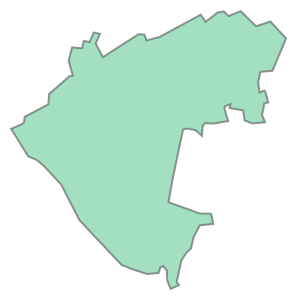

In [22]:
my_geom = municipalities["geometry"].iloc[0]

my_geom

In [23]:
type(my_geom)

shapely.geometry.polygon.Polygon

Myös muut pandasista tutut valinnat toimivat myös GeoPandasissa. Valitaan vaikkapa rivejä "nimi"-sarakkeen perusteella:

In [24]:
parainen = municipalities.loc[municipalities["nimi"] == "Parainen"]
parainen

kunta  vuosi      nimi    namn    name  \
159   445   2024  Parainen  Pargas  Pargas   

                                              geometry  
159  MULTIPOLYGON (((185023.84 6639754.411, 185065....

# GeoDataFrame kartaksi

Samaan tapaan kuin DataFramen, voimme helposti visualisoida myös GeoDataFramen sen `plot`-metodilla. Myös geopandas totetuttaa tämän toiminnallisuuden Matplotlib-kirjaston avulla.

<Axes: >

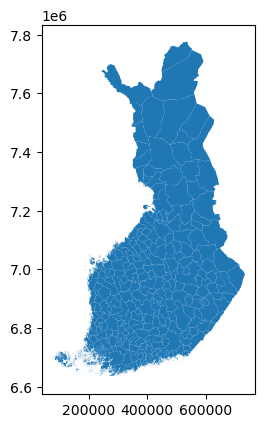

In [25]:
municipalities.plot()

<Axes: >

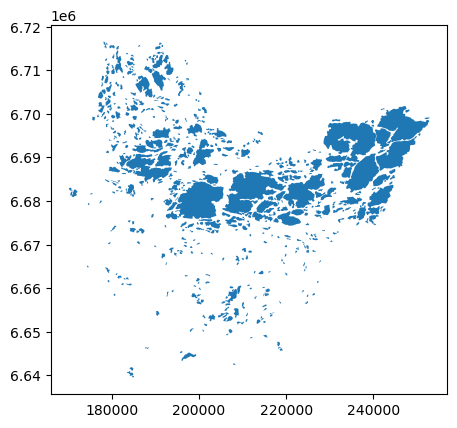

In [26]:
parainen.plot()

Staattisten Matplotlib-pohjaisten karttojen lisäksi voit tutkia GeoDataFramea interaktiivisesti `explore`-metodilla:

In [27]:
parainen.explore()

# Koordinaattijärjestelmät

Paikkatietoanalyyseissä ensiarvoisen tärkeää ovat **koordinaattijärjestelmät**. GeoDataFramen koordinaattijärjestelmään pääsee käsiksi `crs`-attribuutilla:

In [32]:
municipalities.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Yläpuolisesta tulosteesta saamme paljon hyödyllistä tietoa: esimerkiksi sen, että geometrioihin liittyvät yksiköt ovat metrejä.

Projisointi johonkin toiseen koordinaattijärjestelmään tapahtuu `to_crs`-metodilla:

In [33]:
municipalities_wgs = municipalities.to_crs(epsg=4326)
municipalities_wgs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

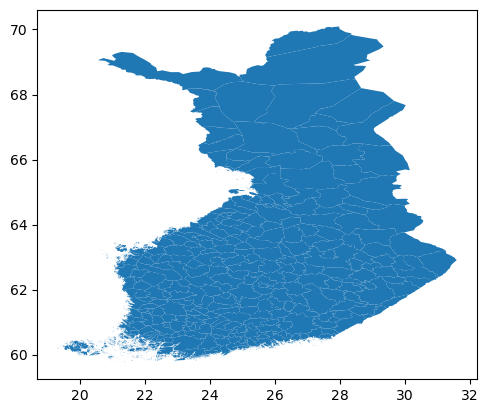

In [34]:
municipalities_wgs.plot(aspect="equal")

Jos GeoDataFramella ei ole `crs`-attribuuttia, ei sitä voida uudelleenprojisoida. Tässä tapauksessa täytyy koordinaattijärjestelmä ensin asettaa `set_crs`-metodilla:

In [192]:
unprojected = municipalities.set_crs(None, allow_override=True)
print(unprojected.crs)
unprojected.head()

None


kunta  vuosi       nimi       namn       name  \
0   005   2024   Alajärvi   Alajärvi   Alajärvi   
1   009   2024  Alavieska  Alavieska  Alavieska   
2   010   2024     Alavus      Alavo     Alavus   
3   016   2024   Asikkala   Asikkala   Asikkala   
4   018   2024     Askola     Askola     Askola   

                                            geometry  lightning_count  \
0  POLYGON ((366787.924 7001300.583, 364487.59 69...            643.0   
1  POLYGON ((382543.364 7120022.976, 382899.505 7...            188.0   
2  POLYGON ((343298.204 6961570.195, 343831.847 6...            584.0   
3  POLYGON ((436139.68 6798279.085, 435714.468 67...            586.0   
4  POLYGON ((426631.036 6720528.076, 428821.749 6...            104.0   

   lightnings_per_km2  
0            0.609646  
1            0.739385  
2            0.514040  
3            0.775426  
4            0.476066

# Geometrioiden toiminnallisuuksia

GeoDataFrame ja GeoSeries toteuttavat lukuisia geometrioiden kanssa tomimiseen tarkoitettuja ja optimoituja attribuutteja ja metodeja. Alla muutama esimerkki.

Aloitetaan laskemalla alueita ja keskipisteitä:

In [193]:
municipalities.area

0      1.054710e+09
1      2.542652e+08
2      1.136098e+09
3      7.557135e+08
4      2.184572e+08
           ...     
304    2.215589e+09
305    5.788517e+08
306    1.327752e+09
307    1.842251e+08
308    9.067169e+08
Length: 309, dtype: float64

<Axes: >

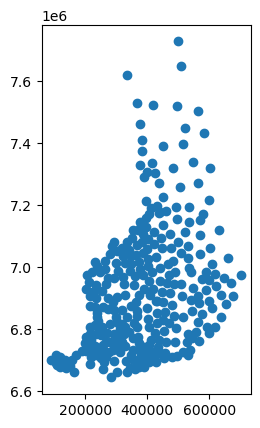

In [194]:
centroids = municipalities.centroid
centroids.plot()

Jokaisen kunnan bounding box eli `enevelope`:

<Axes: >

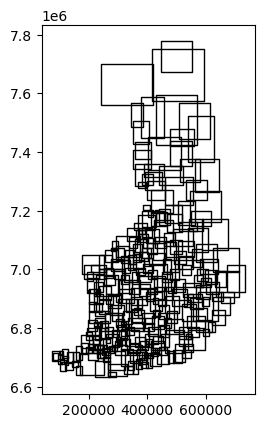

In [195]:
municipalities.envelope.plot(facecolor="none")

Geometrioiden yhdistäminen:

<Axes: >

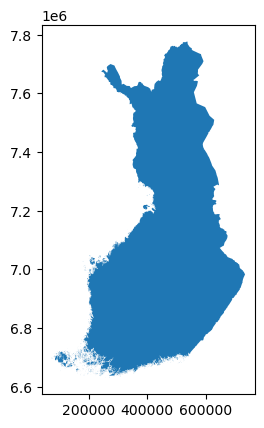

In [196]:
dissolved = municipalities.dissolve()
dissolved.plot()

In [198]:
dissolved

geometry kunta  vuosi      nimi  \
0  MULTIPOLYGON (((103376.778 6654408.619, 103352...   005   2024  Alajärvi   

       namn      name  lightning_count  lightnings_per_km2  
0  Alajärvi  Alajärvi            643.0            0.609646

GeoDataFramen konveksi monikulmio ja bounding box:

<Axes: >

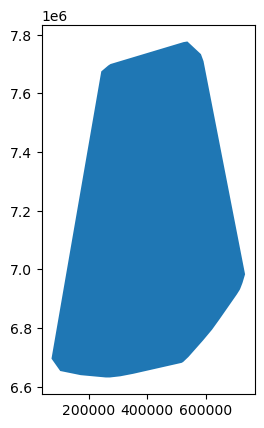

In [125]:
dissolved.convex_hull.plot()

<Axes: >

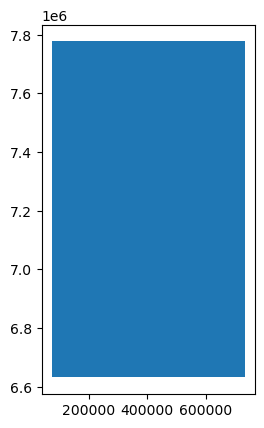

In [200]:
dissolved.envelope.plot()

geometrian yksinkertaistaminen:

<Axes: >

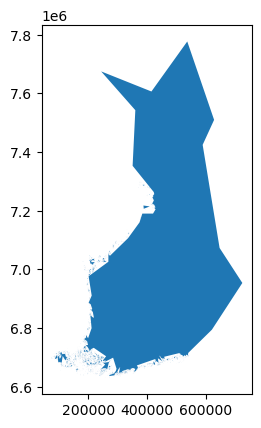

In [202]:
dissolved.simplify(tolerance=40000).plot()

Tarkastellaan lopuksi vielä paria overlay-operaatiota.



In [203]:
helsinki_circle = municipalities.loc[municipalities["nimi"] == "Helsinki"].copy()
helsinki_circle["geometry"] = helsinki_circle.centroid.buffer(150000)

<Axes: >

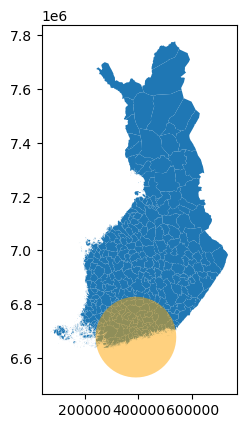

In [204]:
ax = municipalities.plot()
helsinki_circle.plot(ax=ax, facecolor="orange", alpha=0.5)

<Axes: >

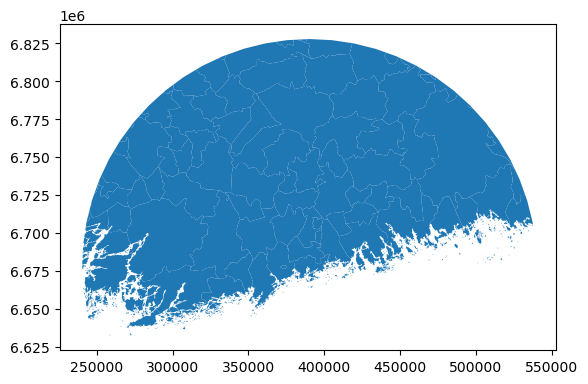

In [179]:
municipalities.overlay(helsinki_circle, how="intersection").plot()

<Axes: >

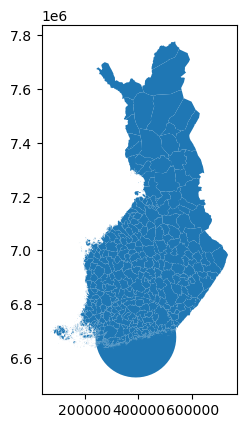

In [185]:
municipalities.overlay(helsinki_circle, how="union", keep_geom_type=False).plot()

<Axes: >

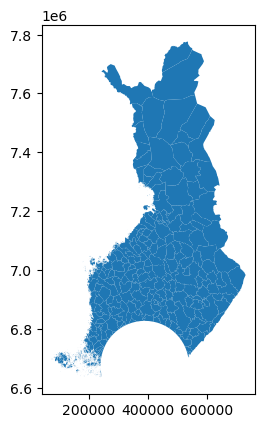

In [186]:
municipalities.overlay(helsinki_circle, how="difference").plot()

# 1. Taulukosta kartalle

In [35]:
import pandas as pd

lightnings = pd.read_csv("./data/lightnings.csv")
lightnings.head()

time  abs_peak_current_ka  latitude  longitude
0  1717200010                  4.0   68.9186    22.1900
1  1717200010                  5.0   68.8757    22.2367
2  1717200010                  2.0   68.7596    22.2646
3  1717200011                  1.0   68.7883    21.7543
4  1717200044                  7.0   68.7939    21.3669

In [36]:
geo_lightnings = gpd.GeoDataFrame(lightnings)
geo_lightnings.head()

time  abs_peak_current_ka  latitude  longitude
0  1717200010                  4.0   68.9186    22.1900
1  1717200010                  5.0   68.8757    22.2367
2  1717200010                  2.0   68.7596    22.2646
3  1717200011                  1.0   68.7883    21.7543
4  1717200044                  7.0   68.7939    21.3669

In [37]:
geo_lightnings = geo_lightnings.set_geometry(
    gpd.points_from_xy(x=lightnings["longitude"], y=lightnings["latitude"])
)

geo_lightnings.head()

time  abs_peak_current_ka  latitude  longitude  \
0  1717200010                  4.0   68.9186    22.1900   
1  1717200010                  5.0   68.8757    22.2367   
2  1717200010                  2.0   68.7596    22.2646   
3  1717200011                  1.0   68.7883    21.7543   
4  1717200044                  7.0   68.7939    21.3669   

                  geometry  
0    POINT (22.19 68.9186)  
1  POINT (22.2367 68.8757)  
2  POINT (22.2646 68.7596)  
3  POINT (21.7543 68.7883)  
4  POINT (21.3669 68.7939)

<Axes: >

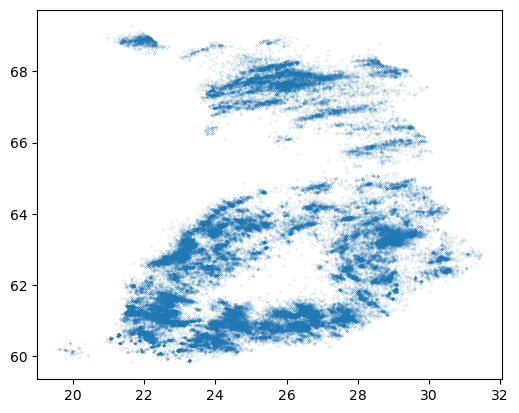

In [38]:
geo_lightnings.plot(markersize=0.01)

In [39]:
geo_lightnings.crs

In [40]:
geo_lightnings = geo_lightnings.set_crs(epsg=4326)
geo_lightnings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
geo_lightnings = geo_lightnings.to_crs(epsg=3067)
geo_lightnings.head()

time  abs_peak_current_ka  latitude  longitude  \
0  1717200010                  4.0   68.9186    22.1900   
1  1717200010                  5.0   68.8757    22.2367   
2  1717200010                  2.0   68.7596    22.2646   
3  1717200011                  1.0   68.7883    21.7543   
4  1717200044                  7.0   68.7939    21.3669   

                         geometry  
0  POINT (307084.785 7652846.986)  
1  POINT (308583.656 7647929.663)  
2   POINT (308705.557 7634930.22)  
3  POINT (288404.648 7639794.935)  
4  POINT (272871.312 7641801.097)

# 2. Salamahavainnot kunnittain

In [42]:
municipalities_with_lightnings = municipalities.sjoin(
    geo_lightnings,
    predicate="contains",
)

In [43]:
municipalities_with_lightnings

kunta  vuosi      nimi      namn      name  \
0     005   2024  Alajärvi  Alajärvi  Alajärvi   
0     005   2024  Alajärvi  Alajärvi  Alajärvi   
0     005   2024  Alajärvi  Alajärvi  Alajärvi   
0     005   2024  Alajärvi  Alajärvi  Alajärvi   
0     005   2024  Alajärvi  Alajärvi  Alajärvi   
..    ...    ...       ...       ...       ...   
308   989   2024    Ähtäri    Etseri    Ähtäri   
308   989   2024    Ähtäri    Etseri    Ähtäri   
308   989   2024    Ähtäri    Etseri    Ähtäri   
308   989   2024    Ähtäri    Etseri    Ähtäri   
308   989   2024    Ähtäri    Etseri    Ähtäri   

                                              geometry  index_right  \
0    POLYGON ((366787.924 7001300.583, 364487.59 69...        16550   
0    POLYGON ((366787.924 7001300.583, 364487.59 69...        65172   
0    POLYGON ((366787.924 7001300.583, 364487.59 69...        23083   
0    POLYGON ((366787.924 7001300.583, 364487.59 69...        17009   
0    POLYGON ((366787.924 7001300.583, 364487.59 69...        21816   
..                                                 ...          ...   
308  POLYGON ((348733.187 6959704.551, 349457.337 6...        28883   
308  POLYGON ((348733.187 6959704.551, 349457.337 6...        65326   
308  POLYGON ((348733.187 6959704.551, 349457.337 6...        51981   
308  POLYGON ((348733.187 6959704.551, 349457.337 6...        14439   
308  POLYGON ((348733.187 6959704.551, 349457.337 6...        62424   

           time  abs_peak_current_ka  latitude  longitude  
0    1717231468                  6.0   62.7704    23.8400  
0    1717248148                  3.0   62.7737    23.8530  
0    1717233166                  3.0   62.7744    23.8495  
0    1717231595                  9.0   62.7846    23.8643  
0    1717232870                  4.0   62.7865    23.8039  
..          ...                  ...       ...        ...  
308  1717234925                  6.0   62.7113    24.0563  
308  1717248245                 21.0   62.7194    24.0354  
308  1717242458                  7.0   62.6830    24.0094  
308  1717230678                  6.0   62.7211    24.0431  
308  1717246706                  5.0   62.7333    24.0454  

[82990 rows x 11 columns]

In [44]:
# Group by district name
group_by = municipalities_with_lightnings.groupby("nimi")

lightnings_by_municipality = group_by.size()
lightnings_by_municipality
#lightnings_by_municipality = lightnings_by_municipality.to_frame()
lightnings_by_municipality = pd.DataFrame(lightnings_by_municipality, columns=["lightning_count"])

In [45]:
type(lightnings_by_municipality)

pandas.core.frame.DataFrame

In [46]:
municipalities = municipalities.merge(
    lightnings_by_municipality,
    left_on="nimi",
    right_on="nimi",
    how="left",
)

<Axes: >

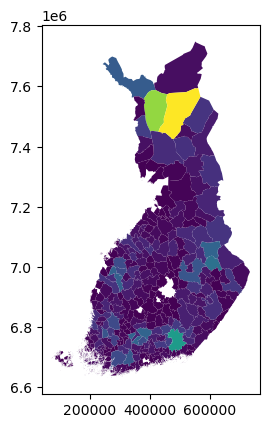

In [47]:
municipalities.plot(
    column="lightning_count"
)

In [48]:
area_km2 = municipalities.area / 1000000
area_km2

0      1054.709619
1       254.265213
2      1136.098002
3       755.713542
4       218.457161
          ...     
304    2215.588988
305     578.851729
306    1327.752364
307     184.225096
308     906.716903
Length: 309, dtype: float64

In [49]:
municipalities["lightnings_per_km2"] = municipalities["lightning_count"] / area_km2
municipalities.head()

kunta  vuosi       nimi       namn       name  \
0   005   2024   Alajärvi   Alajärvi   Alajärvi   
1   009   2024  Alavieska  Alavieska  Alavieska   
2   010   2024     Alavus      Alavo     Alavus   
3   016   2024   Asikkala   Asikkala   Asikkala   
4   018   2024     Askola     Askola     Askola   

                                            geometry  lightning_count  \
0  POLYGON ((366787.924 7001300.583, 364487.59 69...            643.0   
1  POLYGON ((382543.364 7120022.976, 382899.505 7...            188.0   
2  POLYGON ((343298.204 6961570.195, 343831.847 6...            584.0   
3  POLYGON ((436139.68 6798279.085, 435714.468 67...            586.0   
4  POLYGON ((426631.036 6720528.076, 428821.749 6...            104.0   

   lightnings_per_km2  
0            0.609646  
1            0.739385  
2            0.514040  
3            0.775426  
4            0.476066

<Axes: >

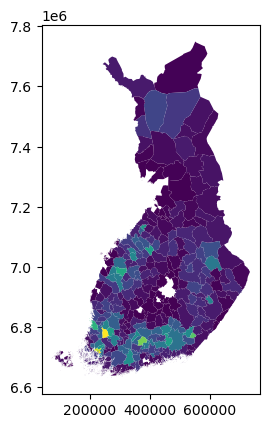

In [50]:
municipalities.plot(column="lightnings_per_km2")

# 3. Tulosten visualisointi

<Axes: >

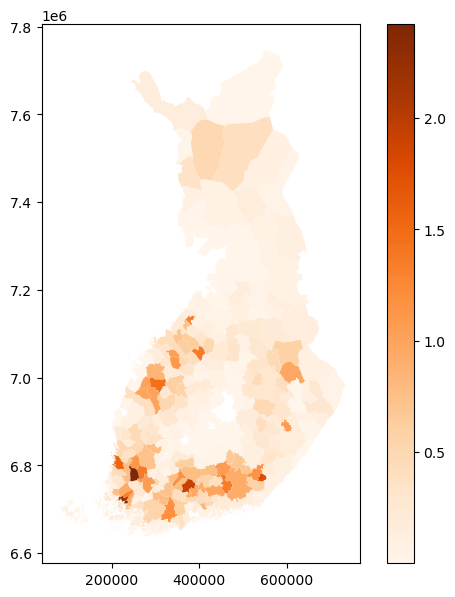

In [51]:
municipalities.plot(
    column="lightnings_per_km2",
    legend=True,
    figsize=(7, 7),
    cmap="Oranges",
)

<Axes: >

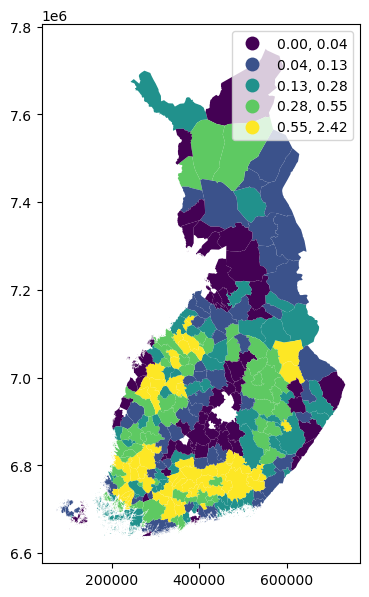

In [52]:
municipalities.plot(
    column="lightnings_per_km2",
    legend=True,
    figsize=(7, 7),
    scheme="quantiles",
)

<Axes: >

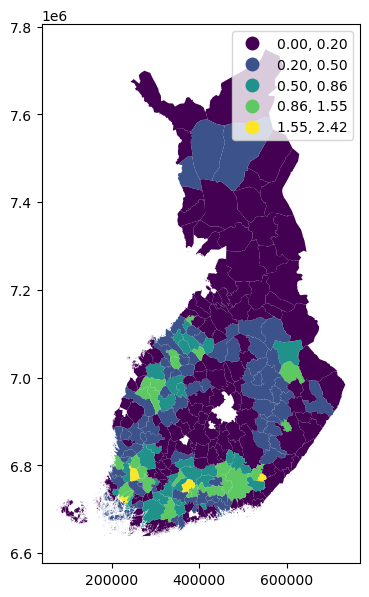

In [53]:
municipalities.plot(
    column="lightnings_per_km2",
    legend=True,
    figsize=(7, 7),
    scheme="naturalbreaks",
)

In [54]:
m = municipalities.explore(
    column="lightnings_per_km2",
    tiles="CartoDB Positron",
    cmap="cividis",
    scheme="naturalbreaks",
    style_kwds={"fillOpacity": 1},
)

In [55]:
m

In [56]:
out_file_path = Path("./map.html")

m.save(out_file_path)